<a href="https://colab.research.google.com/github/FadQode/heart-dis-analysis-dicoding-ml-implementation-course-1stproject/blob/main/notebook753295aae5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
oktayrdeki_heart_disease_path = kagglehub.dataset_download('oktayrdeki/heart-disease')

print('Data source import complete.')


## Import Module yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme()

## Load Dataset yang digunakan

In [ ]:
df = pd.read_csv("/kaggle/input/heart-disease/heart_disease.csv")

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [ ]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [ ]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

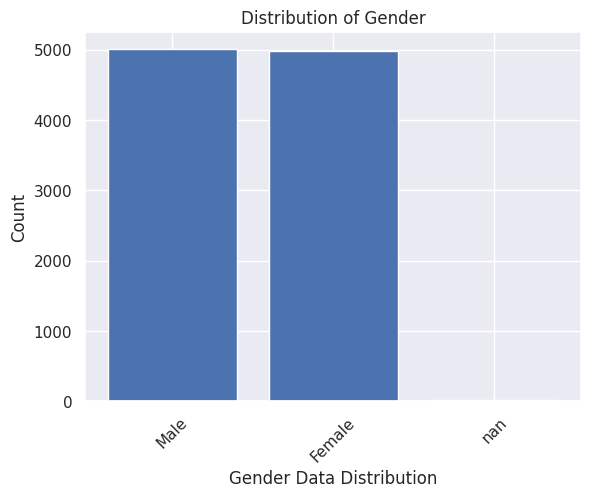

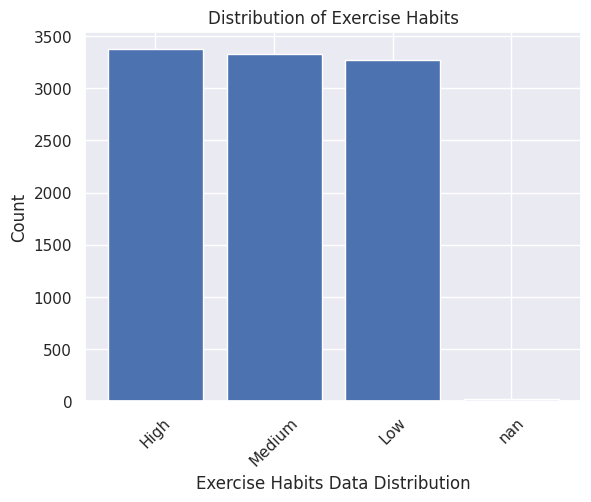

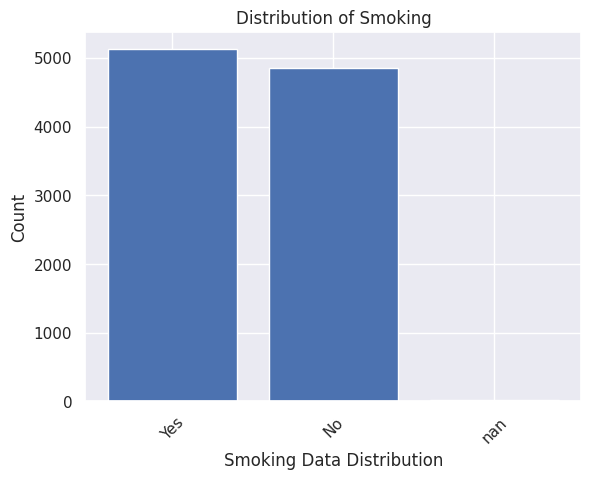

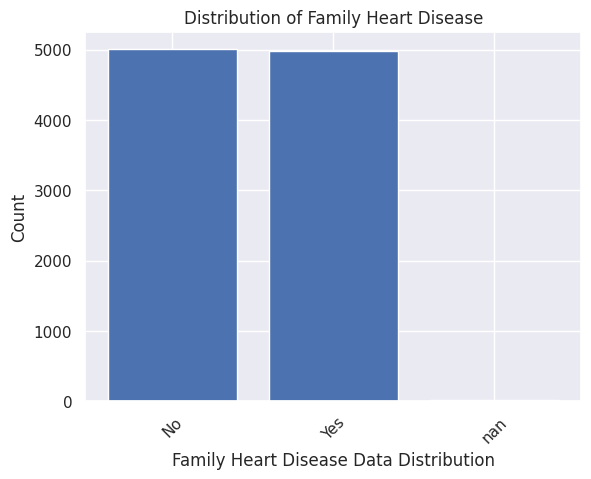

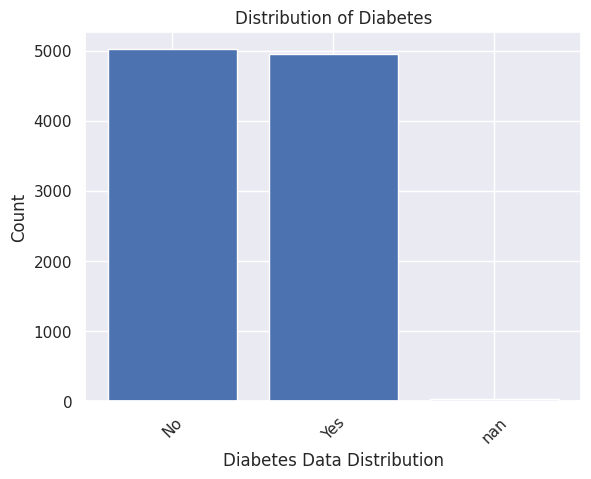

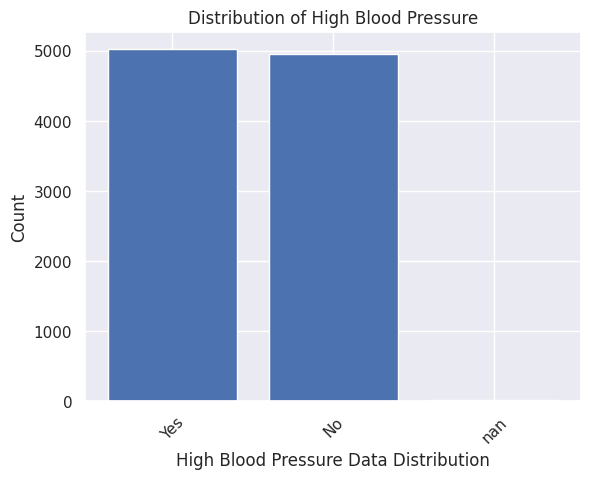

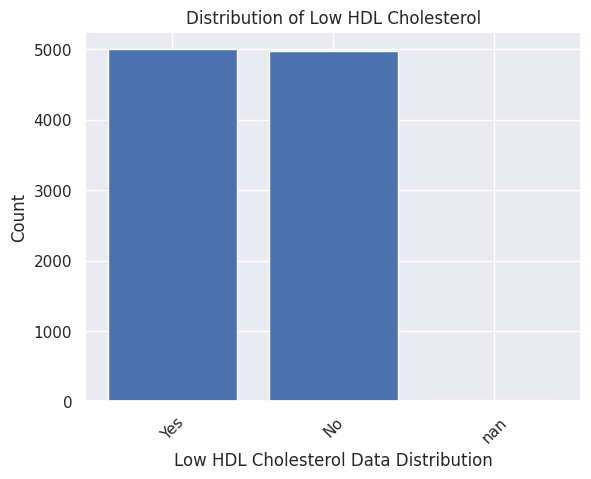

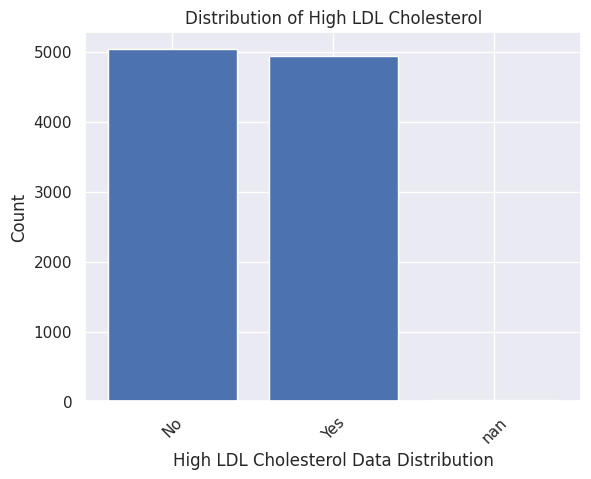

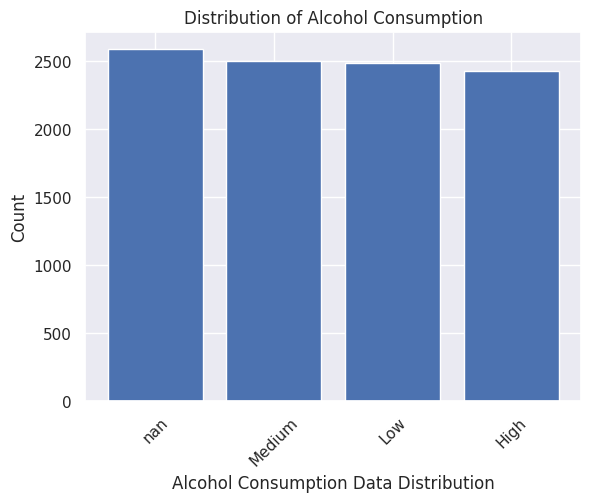

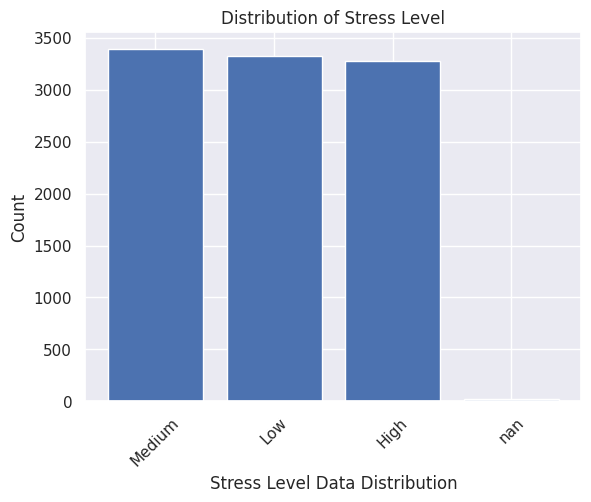

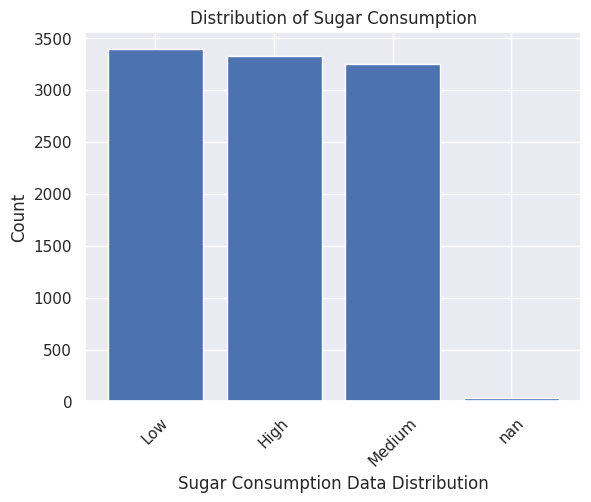

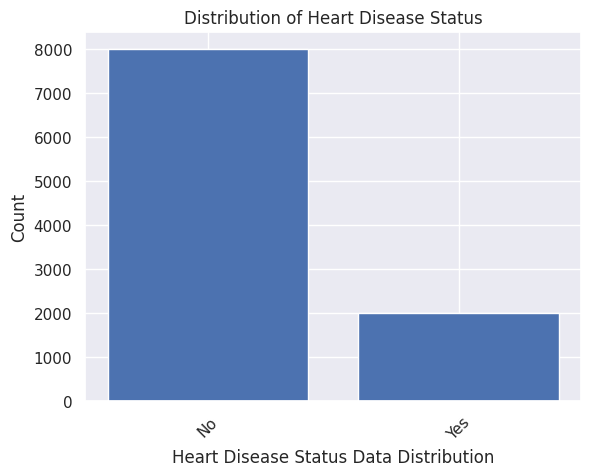

In [ ]:
cat_columns = df.select_dtypes(include=['object']).columns

for columns in cat_columns:
    x = df[columns].value_counts(dropna=False)
    plt.bar( x.index.astype(str), x.values)
    plt.xlabel(f"{columns} Data Distribution")
    plt.ylabel("Count")
    plt.title(f"Distribution of {columns}")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
for columns in cat_columns:
    x = df[columns]
    x.ffill(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [ ]:
df["Alcohol Consumption"] = df["Alcohol Consumption"].fillna("Unknown")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [ ]:
num_col = df.select_dtypes(include=['number'])
num_col.isnull().sum()

num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  9971 non-null   float64
 1   Blood Pressure       9981 non-null   float64
 2   Cholesterol Level    9970 non-null   float64
 3   BMI                  9978 non-null   float64
 4   Sleep Hours          9975 non-null   float64
 5   Triglyceride Level   9974 non-null   float64
 6   Fasting Blood Sugar  9978 non-null   float64
 7   CRP Level            9974 non-null   float64
 8   Homocysteine Level   9980 non-null   float64
dtypes: float64(9)
memory usage: 703.2 KB


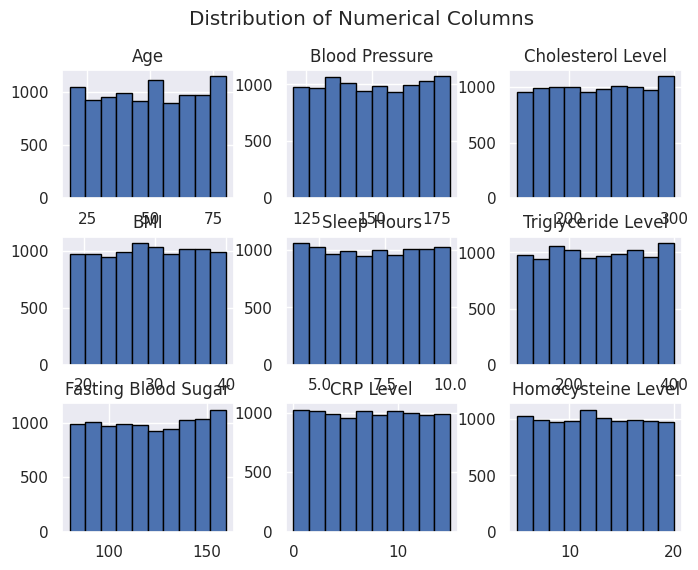

In [ ]:
df.select_dtypes(include=['number']).hist(figsize=(8, 6), bins=10, edgecolor='black')
plt.suptitle("Distribution of Numerical Columns")
plt.show()

In [ ]:

df.fillna(df.mean(numeric_only = True), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption   

In [ ]:
num_col.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


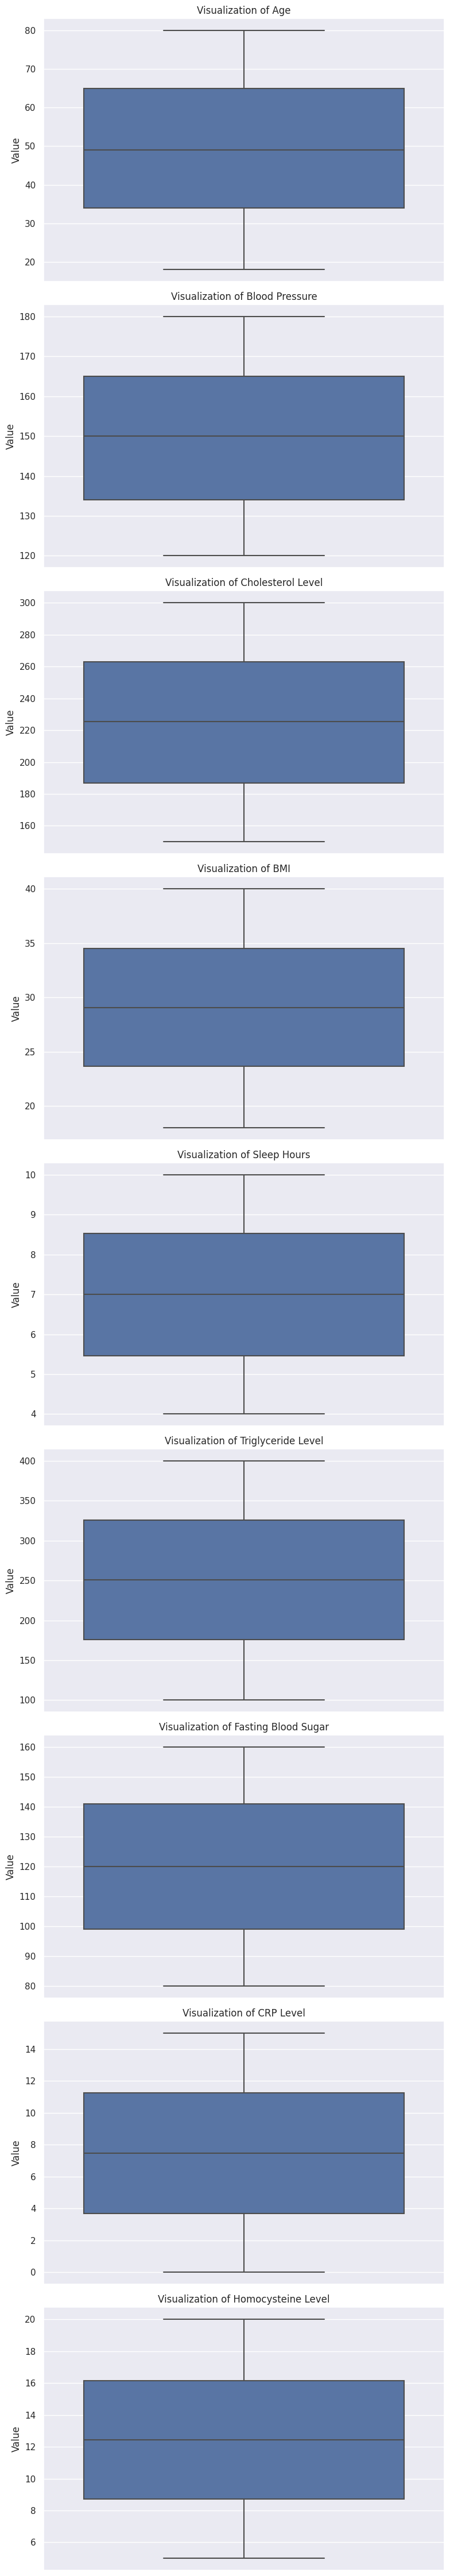

In [ ]:
numerical_columns = num_col.columns

num_features = len(numerical_columns)
fig, axes = plt.subplots(nrows = num_features, ncols=1, figsize=(8, 5 * num_features))

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Visualization of {col}")
    axes[i].set_xlabel(f"")
    axes[i].set_ylabel(f"Value")
plt.tight_layout()
plt.show()